In [1]:
import numpy as np #linear algebra
import pandas as pd # data processing, CSV file 1/0 (pd read csv)
import matplotlib.pyplot as plt #plotting matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# 1. Understanding our data

In [2]:
df = pd.read_csv(r"d:\DAP391m\lab 5_Credit Card Fraud Detection\creditcard.csv")

In [3]:
df.duplicated().sum()

1081

In [4]:
df.duplicated().sum()

1081

In [5]:
df = df.drop_duplicates()

In [6]:
df.duplicated().sum()

0

# 2. Preprocessing

In [7]:
from sklearn. preprocessing import StandardScaler
df ['scaled Amount'] = StandardScaler().fit_transform(df['Amount']. values. reshape(-1, 1))
df ['scaled_Time'] = StandardScaler().fit_transform(df['Time']. values. reshape(-1, 1)) 
df = df. drop (['Time', 'Amount'], axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled Amount,scaled_Time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244200,-1.996823
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342584,-1.996823
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.158900,-1.996802
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.139886,-1.996802
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073813,-1.996781


# 3. Splitting the Data (Original DataFrame)

In [8]:
# Tách các giao dịch gian lận và không gian lận
fraud = df[df['Class']==1]
non_fraud = df[df['Class']==0]

fraud.shape, non_fraud.shape

((473, 31), (283253, 31))

In [9]:
from sklearn.model_selection import train_test_split 
# Chia dữ liệu: 70% cho train và 30% cho test, cho từng loại giao dịch
fraud_train, fraud_test = train_test_split(fraud, test_size=0.3, random_state=42)
non_fraud_train, non_fraud_test = train_test_split(non_fraud, test_size=0.3, random_state=42)

# Kết hợp lại tập huấn luyện và tập kiểm tra
train_data = pd.concat([fraud_train, non_fraud_train])
test_data = pd.concat([fraud_test, non_fraud_test])

In [10]:
train_data.shape, test_data.shape

((198608, 31), (85118, 31))

# 4. Handling Class imbalance (in training set)

In [11]:
df_class_0 = train_data[train_data['Class'] == 0]
print(df_class_0.shape)
df_class_1 = train_data[train_data['Class'] == 1]
print(df_class_1.shape)

(198277, 31)
(331, 31)


In [12]:
df_class_0_under = df_class_0.sample(n=150000)
df_test = pd.concat([df_class_0_under, df_class_1], axis = 0).reset_index(drop=True)
df_test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled Amount,scaled_Time
0,1.184788,0.100879,0.727533,1.041925,-0.337233,-0.072003,-0.271685,-0.068826,1.834025,-0.640834,...,-0.043202,-0.052337,0.098926,0.504549,0.427451,-0.023424,0.002113,0,-0.325411,-1.805694
1,1.249109,-0.832785,0.571217,0.394815,-0.791744,1.019816,-1.158297,0.381368,0.053829,0.726017,...,-0.370214,-0.163594,-1.408119,0.426025,-0.121874,0.087423,0.026178,0,-0.159636,-0.913315
2,-1.551899,-1.274173,0.120635,-0.241025,0.685632,-0.264442,1.327588,-0.401988,0.730801,0.626380,...,0.294504,1.270073,0.725450,-0.061034,0.101901,-0.062723,-0.086745,0,0.365127,0.824034
3,2.045151,0.462807,-2.730193,1.126747,1.593338,-0.040047,0.587333,-0.148944,-0.134127,-0.207822,...,0.053243,-0.141711,-0.468245,0.599888,-0.478610,-0.004760,-0.040452,0,-0.293063,1.184283
4,1.852095,-0.278450,-0.339840,1.606527,-0.431922,-0.233834,-0.204659,-0.012266,1.190130,-0.034655,...,-1.209948,0.399826,-0.167422,-0.340504,-1.098297,0.050319,-0.024472,0,-0.162112,0.616245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150326,-4.446847,-0.014793,-5.126307,6.945130,5.269255,-4.297177,-2.591242,0.342671,-3.880663,-3.976525,...,-0.049586,-0.226017,-0.401236,0.856124,0.661272,0.492560,0.971834,1,-0.349333,-1.140438
150327,-3.586964,2.609127,-5.568577,3.631947,-4.543590,-0.157899,-4.089128,2.417305,-3.239901,-5.822449,...,0.428756,0.182032,-0.534598,0.168933,-0.149844,0.685517,-0.299728,1,0.886375,-0.188372
150328,0.224414,2.994499,-3.432458,3.986519,3.760233,0.165640,1.099378,-0.654557,-2.435416,-2.276733,...,-0.984223,-0.421979,-1.048058,0.726412,0.268625,0.283689,0.419102,1,-0.353327,0.649669
150329,-0.082983,-3.935919,-2.616709,0.163310,-1.400952,-0.809419,1.501580,-0.471000,1.519743,-1.134454,...,-0.182305,-0.921017,0.111635,-0.071622,-1.125881,-0.170947,0.126221,1,4.027641,1.253090


In [13]:
x = df_test.drop('Class', axis=1)
y = df_test['Class']

In [14]:
from imblearn.over_sampling import SVMSMOTE

# Áp dụng kỹ thuật oversampling SMOTE trên tập huấn luyện
sm = SVMSMOTE(sampling_strategy='minority')
x_train_res, y_train_res = sm.fit_resample(x, y)

In [15]:
x_train_res.shape , y_train_res.shape

((300000, 30), (300000,))

In [16]:
balanced_train=  pd.concat([pd.DataFrame(x_train_res), pd.DataFrame(y_train_res, columns=['Class'])], axis=1)

In [17]:
#original_Xtrain = train_data.drop('Class', axis=1)
#original_ytrain = train_data['Class']

In [18]:
original_Xtest = test_data.drop('Class', axis=1)
original_ytest = test_data['Class']

In [19]:
#original_ytrain.value_counts(), original_ytest.value_counts()

In [20]:
#original_train = original_Xtrain 
#original_Xtrain['Class'] = original_ytrain

#original_train = original_train. sample(frac=1) 
#non_fraud_train_ = original_train.loc[original_train['Class'] == 0][:331]

#fraud_train_ = original_train. loc[original_train['Class'] == 1]

#balanced_train = pd.concat ([fraud_train_, non_fraud_train_]) 
#balanced_train['Class'].value_counts()

# 5. Exploratory Data Analysis (EDA)

# 6. Training and Testing the Classifier

In [21]:
# Tạo dữ liệu huấn luyện và nhãn từ balanced_train
balanced_Xtrain = balanced_train.drop('Class', axis=1) 
balanced_ytrain = balanced_train['Class']  
# Chuyển đổi dữ liệu thành mảng NumPy
balanced_Xtrain = balanced_Xtrain.values
balanced_ytrain = balanced_ytrain.values

In [22]:
# Nhập các thư viện phân loại
from sklearn.svm import OneClassSVM 
from sklearn.svm import SVC


# Khởi tạo các bộ phân loại đơn giản
classifiers = {
    "Support Vector Classifier": SVC(),
}


Classifiers: Support Vector Classifier
Accuracy score: 0.9961347776028572
F1 score: 0.4317789291882556
ROC AUC score: 0.9383050326057265
Confusion matrix:
[[84664   312]
 [   17   125]]


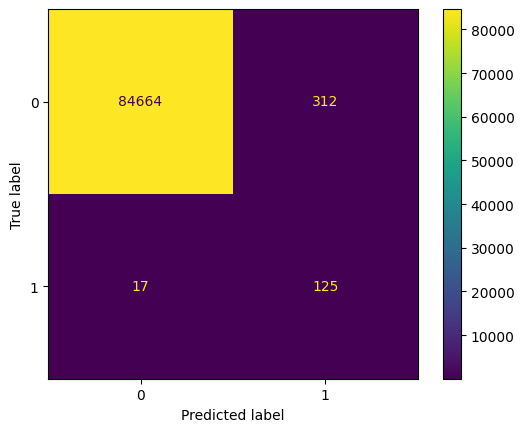

--------------------------------------------------


In [23]:
from sklearn import metrics
import matplotlib.pyplot as plt  # Đảm bảo bạn đã nhập thư viện matplotlib

# Huấn luyện và đánh giá các bộ phân loại
for key, classifier in classifiers.items():  # Sửa 'itens' thành 'items'
    classifier.fit(balanced_Xtrain, balanced_ytrain)  # Huấn luyện mô hình
    original_y_predict = classifier.predict(original_Xtest)  # Dự đoán trên tập test

    # In kết quả đánh giá
    print("Classifiers:", key)
    print("Accuracy score:", metrics.accuracy_score(original_ytest, original_y_predict))  # Sửa thứ tự tham số
    print("F1 score:", metrics.f1_score(original_ytest, original_y_predict))  # Sửa thứ tự tham số
    print("ROC AUC score:", metrics.roc_auc_score(original_ytest, original_y_predict))  # Sửa thứ tự tham số
    print("Confusion matrix:")
    confusion_matrix = metrics.confusion_matrix(original_ytest, original_y_predict)  # Sửa thứ tự tham số
    print(confusion_matrix)

    # Hiển thị ma trận nhầm lẫn
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=classifier.classes_)
    disp.plot()
    plt.show()

print("-" * 50)  # "-" để tạo dấu phân cách

In [24]:
from sklearn.model_selection import GridSearchCV  

# Support Vector Classifier
svc_params = { 
    'C': [0.5, 0.7, 0.9, 1], 
    'kernel': ['rbf', 'poly', 'sigmoid', 'linear']  
}

grid_svc = GridSearchCV(SVC(), svc_params, scoring='roc_auc', cv=5)  
grid_svc.fit(balanced_Xtrain, balanced_ytrain)  # Huấn luyện với GridSearch
svc_best_estimator = grid_svc.best_estimator_ 

print("Best SVM Estimator:", svc_best_estimator)


Best SVM Estimator: SVC(C=1)


In [25]:
# Định nghĩa từ điển các bộ phân loại
classifiers = {
    "Support Vector Classifier": svc_best_estimator,  # Sử dụng biến chứa mô hình tốt nhất của SVC
}

# In ra danh sách các bộ phân loại
for key, value in classifiers.items():
    print(f"{key}: {value}")


Support Vector Classifier: SVC(C=1)


Classifier: Support Vector Classifier
Confusion Matrix:
 [[84664   312]
 [   17   125]]


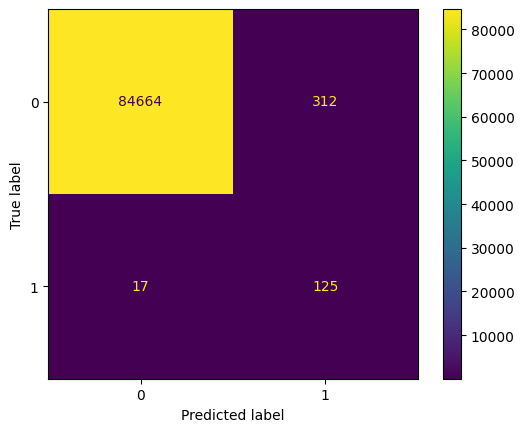

Accuracy Score: 0.9961347776028572
Recall (Fraud Capture Rate): 0.8802816901408451
F1 Score: 0.4317789291882556
ROC AUC Score: 0.9383050326057265
--------------------------------------------------


In [26]:
from sklearn import metrics
import matplotlib.pyplot as plt

# Duyệt qua các bộ phân loại trong từ điển classifiers
for key, classifier in classifiers.items():
    # Huấn luyện mô hình với tập dữ liệu huấn luyện cân bằng
    classifier.fit(balanced_Xtrain, balanced_ytrain)
    
    # Dự đoán trên tập kiểm tra
    original_y_predict = classifier.predict(original_Xtest)
    
    print("Classifier:", key)
    
    # Tính toán ma trận nhầm lẫn
    cm = metrics.confusion_matrix(original_ytest, original_y_predict)
    print("Confusion Matrix:\n", cm)
    
    # Hiển thị ma trận nhầm lẫn
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
    disp.plot()
    plt.show()
    
    # Tính toán và in các chỉ số hiệu suất
    print("Accuracy Score:", metrics.accuracy_score(original_ytest, original_y_predict))
    
    # Tính tỷ lệ thu hồi (Recall - tỉ lệ bắt giữ gian lận)
    recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])  # Recall = True Positives / (True Positives + False Negatives)
    print("Recall (Fraud Capture Rate):", recall)
    
    # Tính F1 Score
    f1 = metrics.f1_score(original_ytest, original_y_predict)
    print("F1 Score:", f1)
    
    # Tính ROC AUC Score
    roc_auc = metrics.roc_auc_score(original_ytest, original_y_predict)
    print("ROC AUC Score:", roc_auc)

    print("-" * 50)  # Dòng phân cách giữa các bộ phân loại
